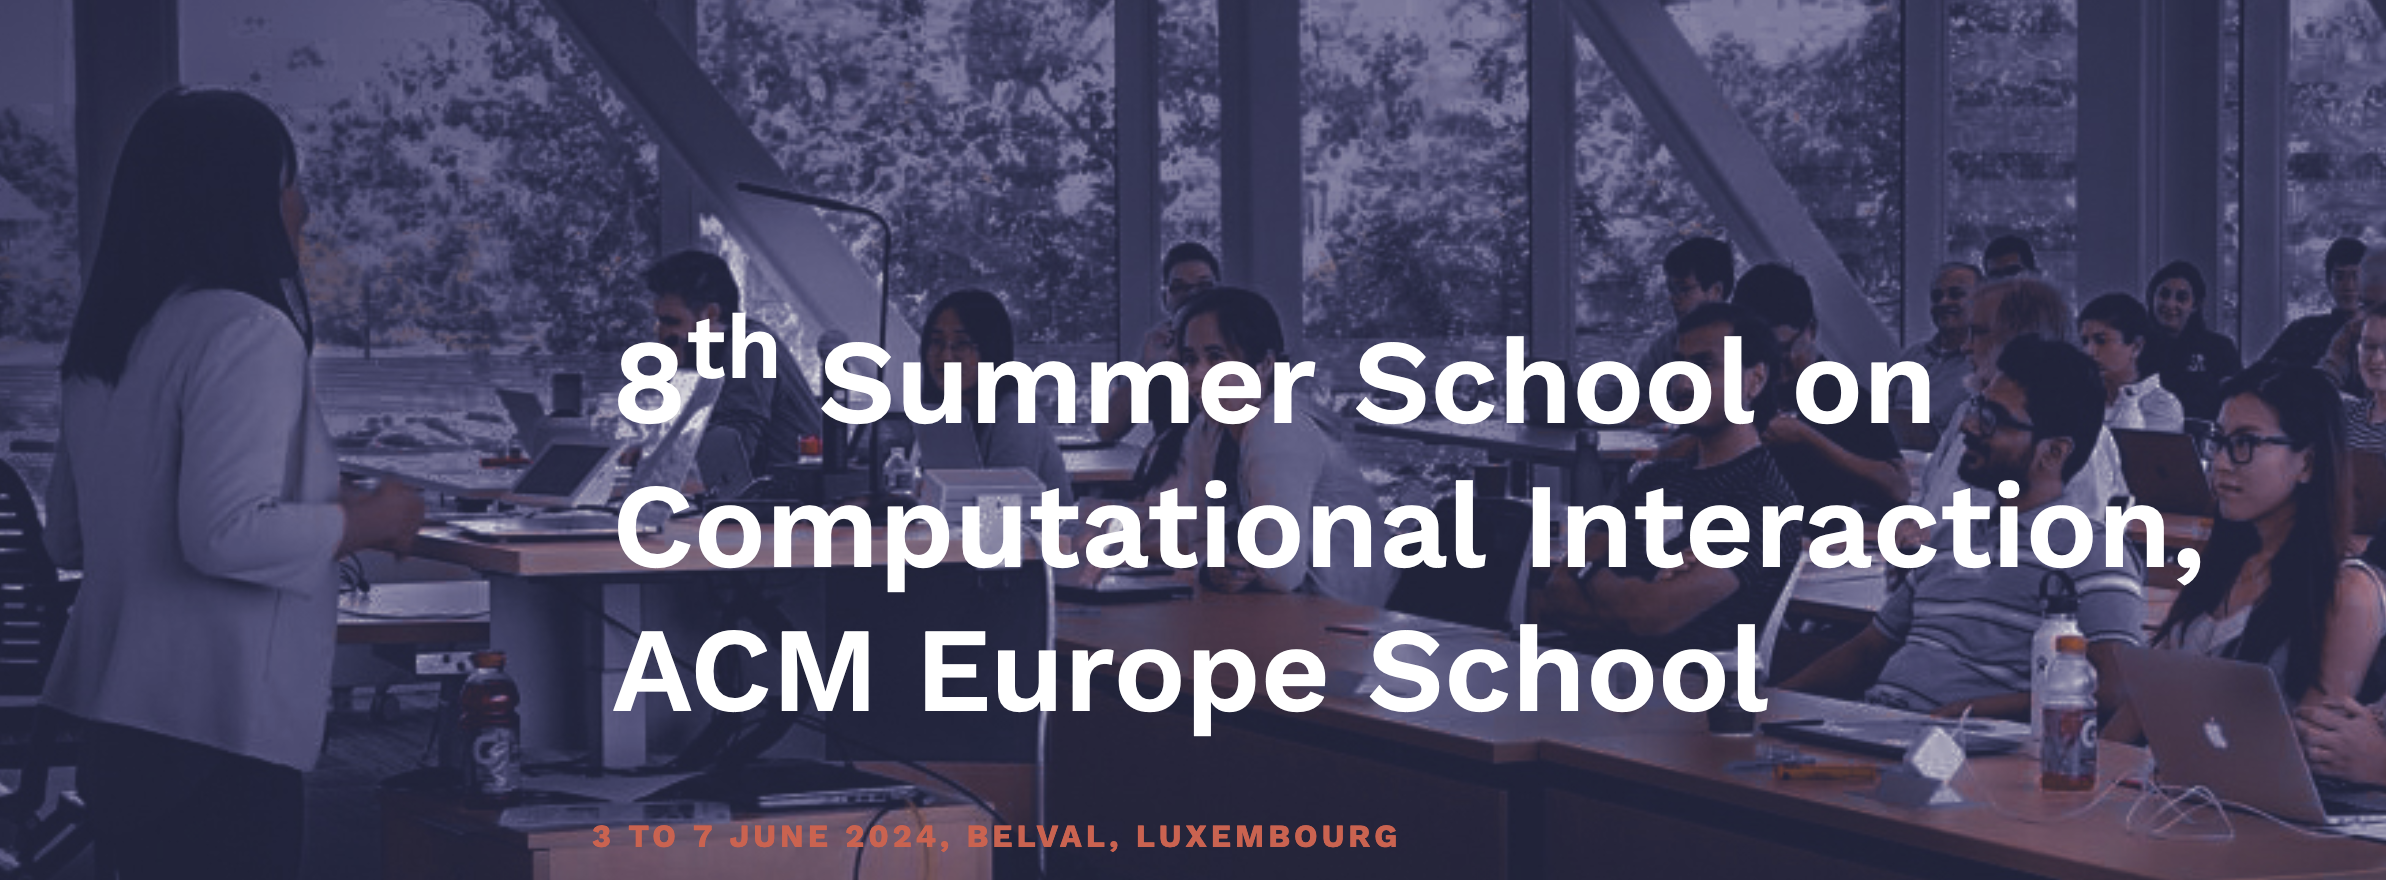

# Optimization methods to support interface design and adaptation
[João Belo](https://scholar.google.dk/citations?user=ANS7JzkAAAAJ&hl=en), [Anna Maria Feit](http://annafeit.de/) \\
[Computational Interaction Group](https://cix.cs.uni-saarland.de/) \\
Saarland University, Saarland Informatics Campus


You can run this notebook locally or on Colab: https://colab.research.google.com/drive/1nUjObTTMTtlr54OgKRDYjjKyneuaWFHy?usp=sharing
If you want to run it locally we recommend creating a new environment using Anaconda, or a similar environment manager.

This notebook introduces you to the field of combinatorial optimization and its applications in HCI. The main goal is to give you an overview of the optimization landscape in terms of what classes of methods exist, what problems they can solve, and how they can be applied to HCI problems. To get some hands on experience we will explore some specific methods in more detail.

But first let's start with some [**Motivation**](https://docs.google.com/presentation/d/1WifqNvzMmXbG07VJv2lv6gla3a5tH41H6IeqkKwxeMo/edit?usp=sharing)

### In the next hours you will learn...

*   What is optimization.
*   How to formulate a design problem as an optimization problem with objectives and constraints.
*  What combinatorial optimization methods there are and how to use them to solve HCI problem.
*  How to deal with multiple optimization criteria, what is the Pareto frontier and how to compute it.


### Practically you will

### References:
[1] Nocedal, Jorge, and Stephen J. Wright, eds. Numerical optimization. New York, NY: Springer New York, 1999.

[2] Boyd, Stephen P., and Lieven Vandenberghe. Convex optimization. Cambridge university press, 2004.

## What is optimization?
> "Optimization is an important tool in decision science and in the analysis of physical systems. To make use of this tool, we must ﬁrst identify some objective, a quantitative measure of the performance of the system under study. This objective could be proﬁt, time, potential energy, or any quantity or combination of quantities that can be represented by a single number. The objective depends on certain characteristics of the system, called variables or unknowns. Our goal is to ﬁnd values of the variables that optimize the objective." [1]

Although this is a generic definition of what optimization is, it outlines key components which are also present when optimizing for HCI problems - **variables**, **objectives**, and **solvers**. Before continuing, take a few minutes to consider the following:

*What could be an objective in an HCI context you work on? Can you formulate it mathematically?*

*What are variables of interest in an optimization problem in your research topics?*

## Formulating optimization problems
Optimization problems typically have the form [1,2]:
\begin{align*}
\text{minimize} \quad & f_0(x) \\
\text{subject to} \quad & f_i(x) \leq b_i, \quad i = 1, \ldots, m.
\end{align*}
Where:
- The $x = (x_1, ..., x_n)$ is the vector of variables of the problem;
- The function $f_0 : \mathbb{R}^n \to \mathbb{R}$ is the objective function that we want to minimize (in this case, but maximization also possible)
- The functions $f_i : \mathbb{R}^n \to \mathbb{R}$ are the constraint functions, or in other words, rules or limits that define the conditions under which the solution must be found (inequality, in this formulation; some formulations also include equality constraints, or no constraints at all).

### Optimality
A vector $x^*$ is called optimal if it has the smallest possible value for the objective function $f_0$ across all possible vectors of $x$ that respect the constraint functions $f_i$. What does this looks like in practice? Let's analyze a plotted objective function:




<div>
<img src=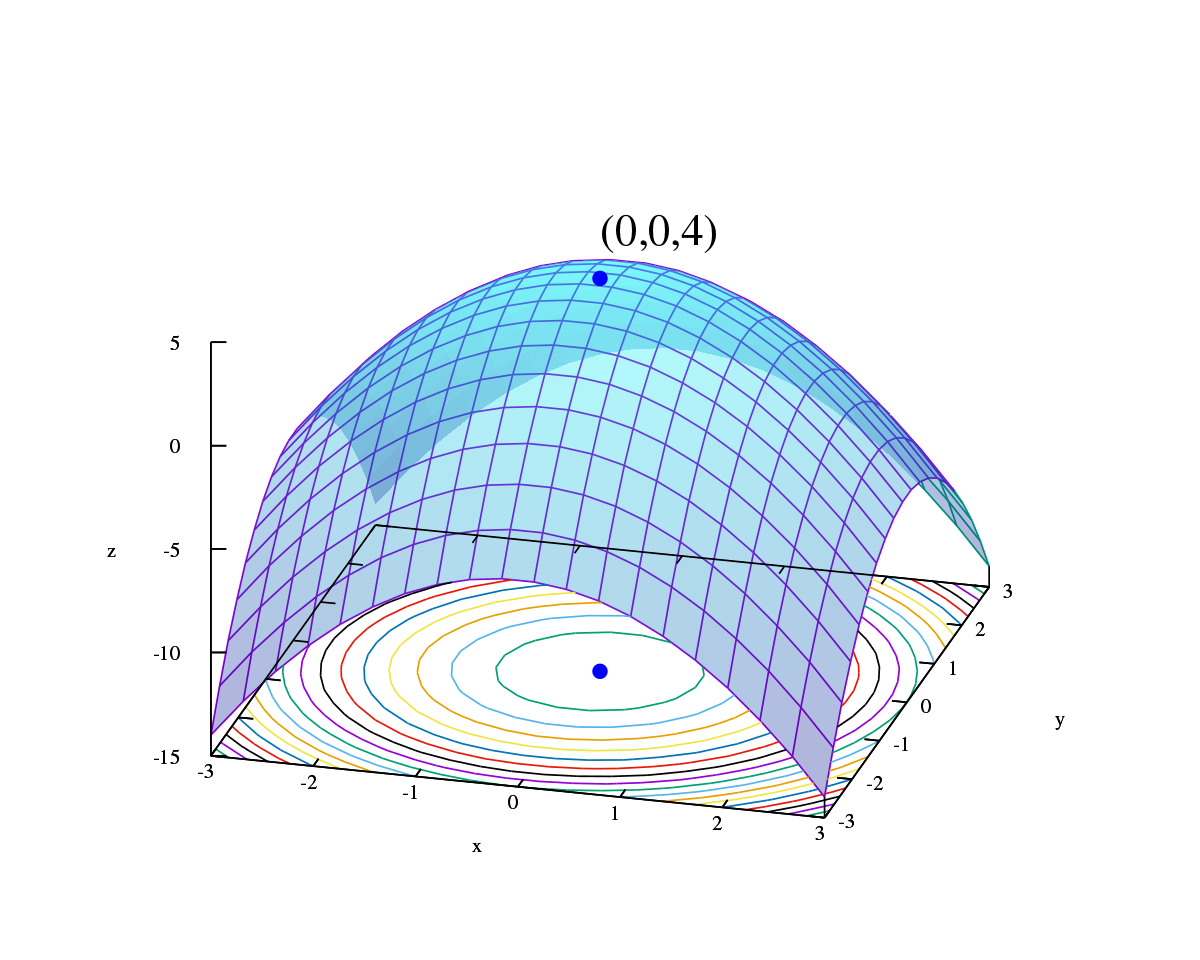 width="600"/>

Source: [Wikipedia](https://en.wikipedia.org/wiki/Mathematical_optimization#/media/File:Max_paraboloid.svg)
</div>


This graph depicts the surface given by $z = f(x, y) = (x^2 + y^2) + 4$. In this example, when maximizing this function, the point $(0, 0, 4)$ is the global optimum.
This example belongs to a class of problems called convex optimization (the line segment joining any two points on its graph lies above or on the graph). In such problems, local optimum are also global optimum, a class of problems that can be solved quite effectively. Unfortunately, not all problems can be formulated as convex optimization problems. Consider the following objective function:


<div>
<img src=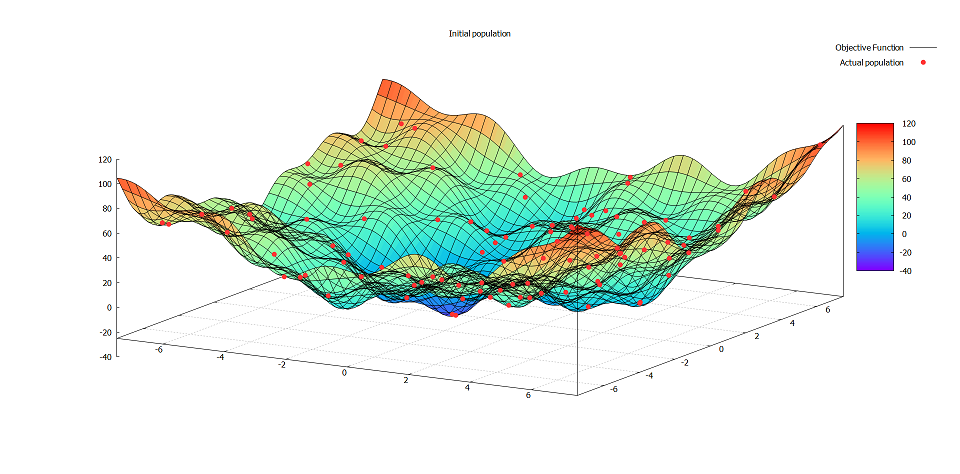 width="600"/>

Source: [EvolutionaryProgramming Repository](https://github.com/morfinPL/evolutionaryProgrammingInHaskell)

</div>

To find the global minimum of such a cost function the optimization method must be robust to getting stuck in local optimum.

### Solvers - Solving optimization problems
Once an optimization problem is formulated, an optimization method is necessary to solve the problem. The formulation of the optimization problem, problem size, and computational budget determine what solvers are appropriate. The choice of a solver typically involves trade-offs between guarantees of optimality, implementation effort, computational efficiency, and effort in formulating the optimization problem.

We will revisit this topic in the next section.

## Optimization in HCI
Now that we went through the key components of an optimization problem, what are **variables, objectives, and solvers** like when applying optimization to HCI problems?

### Variables
Variables are the decisions you want to optimize for. In realistic HCI use cases, a variable will typically be a design decision or a property of a user interaction element that you want to optimize. Depending on your problem, these variables will typically take the form of:

- **real numbers**, such as the position of an element in continuous 2D or 3D space.
- **integers**, that could indicate the level of detail of a widget or the index of an element in a menu.
- **booleans**, for binary decisions, such as enabling or disabling a feature.

*If one was to optimize the positioning and interaction modality of interface elements in 3D (e.g., in Mixed Reality), what could the variables be?*

*Pick an HCI problem in your research topic that you'd like to solve. What variables would that problem have?*


### Objective functions
The objective function will determine what is a good solution to the problem. Depending on how it is formulated, you will solve a minimization (cost) or maximization (utility) problem. A term of a cost function can be about any property of your solution that is desired, such as usability aspects or performance metrics. These terms can be retrieved based on models from literature or constructed from existing guidelines and design patterns. An example of a popular objective function when optimizing user interfaces for performance is Fitt's Law, which we analyse in more detail:

$$MT = a + b \cdot \log_2 \left(\frac{D}{W} + 1\right)$$

In short, it predicts the time required to move to and select a target (*MT*), where *MT* is a function of the distance to the target *D* and the size of the target *W* and *a* and *b* are constants derived from empirical data. What would it look like in practice? Let's find out with an example.

Consider a MR scenario where we want to create an interface to handle incoming calls. Where should the interface pop up when the user receives a call if we minimize *MT*? Assuming the interface is always oriented towards the user, the problem we want to solve can be formulated as follows:

\begin{align*}
\text{minimize} \quad & MT(\text{positionUI, sizeUI}) \\
\end{align*}

If this is our final formulation, the solution space will be unnecessarily large.

*What can we do about that?*

In [60]:
%%capture
%matplotlib inline

!pip install ipython_genutils ipyvolume;
!pip install trimesh;
!pip install gdown;
!gdown "https://drive.google.com/uc?id=1nj-rPRlMavx1CTrUzUC571bplnfc6VN1" -O model.stl;

In [ ]:
# imports
import trimesh
import ipyvolume as ipv
import numpy as np
import warnings
import time
# warnings.filterwarnings('ignore')

In [ ]:
# This function plots virtual MR UI elements according to an array of their respective [x,y,z] positions
# e.g., plot_mr_scenario([[]])
def plot_mr_scenario(ui_properties, gaze=False):
    """
    Plot the MR scenario specified above.

    Parameters:
        ui_properties (array): position of the UI element and width of the UI element.
        gaze (boolean): Plot gaze line.

    Returns:
        float: Time (T) in seconds to hit the target.
    """
    # Load the model from (https://skfb.ly/n5k4i3fdc0) by onmioji
    # licensed under Creative Commons Attribution (http://creativecommons.org/licenses/by/4.0/).
    mesh = trimesh.load_mesh("model.stl")
    vertices = mesh.vertices
    faces = mesh.faces

    fig = ipv.figure()
    # Plot the 3D model
    vertices = vertices / 300 + [0.5, 1, 0]
    ipv.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces)
    # Plot the UI element
    for ui in ui_properties:
        ipv.plot_trisurf([ui[0]-ui[3]/2, ui[0]+ui[3]/2, ui[0]-ui[3]/2, ui[0]+ui[3]/2],
         [ui[1]-ui[3]/2, ui[1]+ui[3]/2, ui[1]+ui[3]/2, ui[1]-ui[3]/2], ui[2],
            triangles=[[0, 2, 3], [2, 3, 1]], color="blue")

    if gaze:
        x = 0.5
        y = 1.8
        z = np.linspace(0, 1, 100)
        ipv.plot(x, y, z, color='blue', size=2)

    ipv.pylab.xyzlabel("X [m]", "Y [m]", "Z [m]")

    ipv.show()

In [ ]:
# plot scenario with UI element in front of the user
plot_mr_scenario([[0.5, 1.3, 0.6, 0.2]]);

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### Constraints
The solution space of an optimization problem is determined by the variables and the constraints in its formulation. Formulating requirements, rules, and undesired solutions in your problem as additional constraints can improve solver efficiency and avoid invalid solutions.

In our scenario, we know that we want to place the UI in front of the user and at a reasonable distance so they can interact with it using their hands. Our variables in this case will be x, y, z, and w. The coordinate system used by ipyvolume is a right-handed coordinate system and we assume meters as the unit of measurement (see plot, x -> right, y -> up, z -> forward). In our scenario, w will be size of a squared UI 2D panel. This is the problem we want to solve:

\begin{align*}
\text{minimize} \quad & MT(UI_1(x, y, z, w)) \\
\text{subject to} \quad & x_1 \leq x \leq x_2 \\
\quad & y_1 \leq y \leq y_2 \\
\quad & z_1 \leq z \leq z_2 \\
\quad & w_1 \leq w \leq w_2 \\
\end{align*}

*Define the constraints in code for our problem.*

In [ ]:
def fitts_law(distance, width, a=0.1, b=0.4):
    """
    Calculate the time to hit a target using Fitts' Law.
    Note: Fitts' Law primarily considers movements in a two-dimensional plane, for mid-air interactions it might
    require adaptations and empirical adjustments to accurately model the performance of these interactions.

    Parameters:
        distance (float): Distance to the target (D).
        width (float): Width of the target (W).
        a (float): Empirically determined constant. Defaults to an unprincipled approximation for 3D movements.
        b (float): Empirically determined constant. Defaults to an unprincipled approximation for 3D movements.

    Returns:
        float: Time (T) in seconds to hit the target.
    """
    index_of_difficulty = np.log((distance / width) + 1)
    time = a + b * index_of_difficulty
    return time

# In our use case we consider the width of the button to accept the call to be 20% of the size of the UI element
def mt(x, y, z, w):
    """
    Compute the cost for a specific position and size of a UI element.
    """
    # Compute the Euclidean distance from end effector to UI (button to accept call is in the center)
    # End effector (right fingertip is at position (-0.1, 0, 0.1) in this example
    distance = np.linalg.norm(np.array([x, y, z]) - np.array([-0.1, 1, 0.1]))
    width = w / 0.2
    return fitts_law(distance, width)

# TODO: Play around with different combinations of values for x, y, z, w. How does the cost change?
print(mt(0.5, 0.5, 0.5, 0.3))

In [ ]:
# Define constraints for this specific problem. Replace the placeholders with actual values (use the plot for guidance)
# constraints = [(x1, x2), (y1, y2), (z1, z2), (w1, w2)]
constraints = [(-0.2, 0.8), (1, 2), (0.1, 1), (0.1, 0.3)]

Now that we have formulated an optimization problem with variables, cost function, and constraints, we need a method to solve it.

Here, we cover a non-exhaustive overview of properties of interest that solvers and objective functions can have (which affect the choice of solver). Having the ability to identify which classes are relevant to your problem can help you pick effective solvers for your use-case:
#### **Gradient**
**First/Second Order Methods:** Objective function must be differentiable; solvers that use gradient information to find solutions.

**Zero-Order Methods:** Solvers which do not use gradients, making them suitable for non-smooth, noisy, or black-box functions where gradient computation is not feasible.


---


#### **Solution**
**Exact:** Methods which guarantee a solution that is a global optimum once they terminate.

**Approximate:** Methods that provide an approximate solution which is close to the optimal but not necessarily exact. Some of these methods can get stuck in local optimum.


---


#### **Objective Function**
**Explicit functions**: Explicit functions have a clearly defined mathematical expression. Their structure, parameters, and relationships within the function are clearly defined.

**Black-box functions**: These functions have unknown or complex internal structures. They can only be evaluated through input-output pairs without insight into their internal mechanisms.


---


We will start with exhaustive search. Although this is quite a basic optimization method, extensions of exhaustive search have been used successfully in HCI. For example, [Supple](https://dl.acm.org/doi/abs/10.1145/964442.964461) uses branch and bound, which uses heuristics to prune suboptimal branches of the search space, while [XRgonomics](https://dl.acm.org/doi/10.1145/3411764.3445349) uses a data structures for efficient retrieval of optimal solutions.

*To which classes belongs the exhaustive search solver?*

In [ ]:
def exhaustive_search_4d(cost_function, constraints, intervals):
    """
    Perform exhaustive search on a 4D domain.

    Args:
    - cost_function (function): A cost function that takes four integers and returns a value.
    - constraints (array of tuples): Constraints for the search space.
    - intervals (array of floats): Step / discretization.

    Returns:
    - best_cost: The best lowest cost found.
    - best_solution: The values [x, y, z, w] corresponding to the best solution.
    """
    best_cost = float('inf')  # Assuming we are looking for the minimum value.
    best_solution = None

    # Iterate over each dimension according to constraints and intervals.
    for x in np.arange(constraints[0][0], constraints[0][1], intervals[0]):
        for y in np.arange(constraints[1][0], constraints[1][1], intervals[1]):
            for z in np.arange(constraints[2][0], constraints[2][1], intervals[2]):
                for w in np.arange(constraints[3][0], constraints[3][1], intervals[3]):
                    current_cost = cost_function(x, y, z, w)
                    if current_cost < best_cost:
                        best_cost = current_cost
                        best_solution = [x, y, z, w]

    return best_cost, best_solution,

# discretization step per dimension
intervals = [0.05, 0.05, 0.05, 0.02]
start_time = time.time()
best_cost, best_solution = exhaustive_search_4d(mt, constraints, intervals)
end_time = time.time()
print(f"Optimization completed in {end_time - start_time:.3f}s. Best solution for x,y,z,w: {best_solution}, Cost: {best_cost}")

Optimization completed in 0.622s. Best solution for x,y,z,w: [-0.10000000000000003, 1.0, 0.1, 0.1], Cost: 0.1


In [ ]:
# Let's now plot the best solution
plot_mr_scenario([best_solution]);

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

*This solution does not look great. Why? What can we do to improve?*

*Try to discretize the solution space further by reducing the values in the interval array. What issue do you experience?*

### Multi-objective optimization
In our current formulation we are minimizing for movement time, but in most realistic HCI problems there are multiple aspects a designer must optimize for. In our MR scenario, usability aspects such as visibility and reachability of the interface (for hand input) are crucial. Let's revisit our formulation to consider visibility of the interface:

\begin{align*}
\text{minimize} \quad & \left[ \begin{aligned}
& MT(UI_1(x, y, z, w)) \\
& VisibilityCost(UI_1(x, y, z, w))
\end{aligned} \right] \\
\text{subject to} \quad & x_1 \leq x \leq x_2 \\
                        & y_1 \leq y \leq y_2 \\
                        & z_1 \leq z \leq z_2 \\
                        & w_1 \leq w \leq w_2 \\
\end{align*}

*How would you implement a cost function to optimize for visibility?*
*Can we solve this problem using the solver above? Why?*

#### Solving multi-objective problems
Having multiple objectives brings additional challenges. In such formulations, it is often the case that it is impossible to improve on one objective without detiorating another. Therefore, when solving for a single solution, the developer/designer must articulate preferences in terms of the relative importance objectives. This can be done in various ways (refer to the survey of [Marler and Arora](https://link.springer.com/article/10.1007/s00158-003-0368-6)), but one of the most pre-dominant techniques to do so in HCI is to use the weighted sum method:
$$C_x = \sum_{j=1}^k w_i \cdot F_i(x)$$
where $C_x$ is the cost of solution $x$, calculated by summing the products of weights $w_i$ and respective cost functions $F_i$ for each $k$ criterion $i$.

In [ ]:
def visibility_cost(x,y,z,w):
    """
    Compute the cost based on the position of a UI element in the user's field of view.

    Returns:
        float: Cost.
    """
    # transform our point according to the position of the user's head
    ui_pos = np.array([x, y, z]) - np.array([0.5, 1.8, 0])
    # in our scenario the user is facing the z axis, therefore, we want to compute the angle according to the "forward" vector (0, 0, 1)
    gaze = np.array([0, 0, 1])

    # compute the angle
    dot_product = np.dot(ui_pos, gaze)
    norm1 = np.linalg.norm(ui_pos)
    norm2 = np.linalg.norm(gaze)
    if norm1 * norm2 <= 0:
        cost = 0
    else:
        cos_angle = dot_product / (norm1 * norm2)
        angle_radians = np.arccos(cos_angle)
        cost = np.degrees(angle_radians)

    # Optional: modify the cost to consider relation between size of the UI element (w) and distance
    return cost

# TODO: change the values of x, y, z, w and notice how it affects the cost
x, y, z, w = 0, 1.8, 0.3, 0.2
plot_mr_scenario([[x, y, z, w]]);
print(f"Visibility Cost: {visibility_cost(x, y, z, w)}")

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Visibility Cost: 59.03624346792648


In [ ]:
def weighted_sum_cost_function(x, y, z, w):
    # TODO: define values for the weights and see how that affects the optimal solution.
    # What do you notice? Can you improve on it?
    w1, w2 = 1, 1
    return w1 * mt(x,y,z,w) + w2 * visibility_cost(x,y,z,w)

constraints = [(-0.2, 0.8), (1, 2), (0.4, 1), (0.06, 0.1)]
intervals = [0.05, 0.05, 0.05, 0.04]
best_cost, best_solution = exhaustive_search_4d(weighted_sum_cost_function, constraints, intervals)
plot_mr_scenario([best_solution]);

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

It is difficult to find a good combination of weights that nicely trade-off between ergonomics and visibility, right? Having cost functions of different scales makes it harder.
*Why do you think this is the case?*

### Pareto Optimality
When solving multi-objective optimization problems, it is often the case that we cannot fullfill one objective without making at least one other objective worse off. We refer to such solutions as pareto-optimal, and the combination of all of these is called the pareto frontier. Using approaches such as the weighted-sum method limits which solutions one can achieve, depending of the formulation of optimization problem. For example, the shape of the pareto frontier affects what optimal solutions are possible to obtain when using the weighted sum method. See the figure below from our [paper](https://dl.acm.org/doi/abs/10.1145/3586183.3606799) that illustrates this:
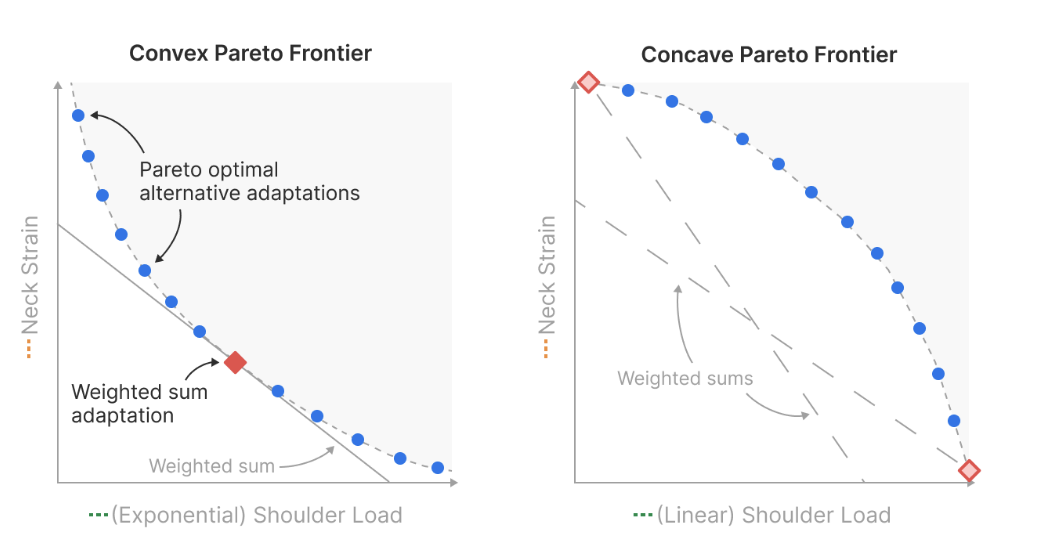

Now, we update our solver so we can retrive the pareto frontier for our two objectives:

In [ ]:
def exhaustive_search_4d_pareto(cost_functions, constraints, intervals):
    """
    Perform exhaustive search on a 4D domain.

    Args:
    - cost_function (function): A cost function that takes four integers and returns a value.
    - constraints (array of tuples): Constraints for the search space.
    - intervals (array of floats): Step / discretization.

    Returns:
    - best_cost: The best lowest cost found.
    - best_solution: The values [x, y, z, w] corresponding to the best solution.
    """
    best_cost = float('inf')  # Assuming we are looking for the minimum value.
    best_solution = None
    x_dim = np.arange(constraints[0][0], constraints[0][1], intervals[0])
    y_dim = np.arange(constraints[1][0], constraints[1][1], intervals[1])
    z_dim = np.arange(constraints[2][0], constraints[2][1], intervals[2])
    w_dim = np.arange(constraints[3][0], constraints[3][1], intervals[3])

    costs = np.empty([x_dim.shape[0] * y_dim.shape[0] * z_dim.shape[0] * w_dim.shape[0], 2])
    solution = []
    i = 0

    # Iterate over each dimension according to constraints and intervals.
    for x in x_dim:
        for y in y_dim:
            for z in z_dim:
                for w in w_dim:
                    costs[i][0] = cost_functions[0](x, y, z, w)
                    costs[i][1] = cost_functions[1](x, y, z, w)
                    solution.append((x, y, z, w))
                    i += 1

    # Find the non_dominated points
    non_dominated = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        if non_dominated[i]:
            non_dominated[non_dominated] = np.any(costs[non_dominated]<c, axis=1)  # Keep points with a lower cost
            non_dominated[i] = True

    pareto_front = []
    idx = np.nonzero(non_dominated)
    for i in idx[0]:
        pareto_front.append([solution[i], costs[i]])
    return pareto_front

# discretization step per dimension
constraints = [(-0.2, 0.8), (1, 2), (0.2, 1), (0.06, 0.1)]
intervals = [0.05, 0.05, 0.05, 0.04]
start_time = time.time()
pareto_front = exhaustive_search_4d_pareto([mt, visibility_cost], constraints, intervals)
end_time = time.time()
print(f"Optimization completed in {end_time - start_time:.3f}s.")

Optimization completed in 3.935s.


In [ ]:
solutions = []
for p in pareto_front:
    solutions.append(p[0])

plot_mr_scenario(solutions);

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

*Is this what you expected? Which solution would you prefer?*

*Increase the discretization of the solution space. What do you notice?*

### Solving our optimization problem faster
If we increase the dimensions (e.g., by adding more UI elements, or design options) exhaustive search is not going to be efficient enough for real-time scenarios like online MR adaptations. Furthermore, discretization might be undesirable in some scenarious. Meta-heuristic methods are high-level frameworks that employ strategies to explore and exploit the search space of complex optimization problems, to find near-optimal solutions efficiently. They generally involve iterative processes and guided randomness to balance between intensification (exploiting known good solutions) and diversification (exploring new regions of the search space), aiming to converge to a globally optimal or satisfactory solution over time.

Here, we will introduce you to genetic algorithms. This meta-heuristic algorithm has the advantage of being highly parallelizable and having many variants that you can look into depending on your specific needs. We provide you with a basic implementation tailored to our scenario. Note that this implementation is simplified, there are opportunities to improve on its efficiency!

[Pseudo code](https://dl.acm.org/doi/abs/10.1145/3586183.3606799)

In [ ]:
# Parameters
population_size = 250
mutation_rate = 0.4
crossover_rate = 0.7
num_generations = 500

constraints = [(-0.2, 0.8), (1, 2), (0.2, 1), (0.06, 0.1)]
population = np.array([
    np.random.uniform(low=constraints[0][0], high=constraints[0][1], size=10000),
    np.random.uniform(low=constraints[1][0], high=constraints[1][1], size=10000),
    np.random.uniform(low=constraints[2][0], high=constraints[2][1], size=10000),
    np.random.uniform(low=constraints[3][0], high=constraints[3][1], size=10000),
]).T

def non_dominated_solutions(fitnesses):
    # Find the non_dominated points
    non_dominated = np.ones(fitnesses.shape[0], dtype = bool)
    for i, c in enumerate(fitnesses):
        if non_dominated[i]:
            non_dominated[non_dominated] = np.any(fitnesses[non_dominated]<c, axis=1)  # Keep points with a lower cost
            non_dominated[i] = True
    return non_dominated


def fitness(genome):
    return np.array([mt(*genome), visibility_cost(*genome)])


# select non-dominated solutions
def selection(population):
    fitnesses = np.array([fitness(individual) for individual in population])
    non_dominated = non_dominated_solutions(fitnesses)

    pareto_front = []
    idx = np.nonzero(non_dominated)
    pareto_front = population[idx]

    return pareto_front


def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, 4)
        return np.concatenate([parent1[:point], parent2[point:]]), np.concatenate([parent2[:point], parent1[point:]])
    else:
        return parent1, parent2


# mutate one value in the solution at random
def mutate(genome):
    if np.random.rand() < mutation_rate:
        idx = np.random.randint(0, 4)
        genome[idx] = np.random.uniform(low=constraints[idx][0], high=constraints[idx][1])
    return genome


# Genetic algorithm execution
for generation in range(num_generations):
    # Selection
    selected = selection(population)

    # Crossover
    offspring = np.empty([population_size, 4])
    for i in range(0, population_size, 2):
        offspring1, offspring2 = crossover(selected[np.random.randint(0, selected.shape[0])], selected[np.random.randint(0, selected.shape[0])])
        offspring[i] = offspring1
        offspring[i+1] = offspring2

    # Mutation
    population = np.array([mutate(individual) for individual in offspring])

    # Evaluate best solution (Pareto front)
    pareto_front = selection(population)

In [ ]:
solutions = []
for p in pareto_front:
    solutions.append(p)

plot_mr_scenario(solutions);

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

*What are your thoughts on this results? How can you prioritize speed or quality of solutions with such an approach?*

So far we went over three crucial components of an optimization problem for adapting user interfaces in MR: **objective functions**, **solvers**, and **variables**. However, there is more aspects one must consider when designing real-time adaptations. If you want to learn more check our [AUIT toolkit](https://dl.acm.org/doi/abs/10.1145/3526113.3545651), a Toolkit for Designing XR Applications.

Before proceeding to a final more open ended exercise, we leave you a (non-exhaustive) list of interesting optimization methods you can explore further, depending on the problem you want to solve:
- **Branch and bound**: technique for solving optimization problems that systematically explores potential solutions (branches), pruning off entire branches when heuristics signal they cannot contain a better solution than the best one already found.
Paper HCI use case: Optimization of UIs to different device form factors
- **(Integer) Linear Programming**: method to achieve the best outcome (such as maximum profit or lowest cost) in a mathematical model whose requirements and objective are represented by linear relationships. In integer LP the variables are constrained to integers.
- **Metaheuristic Methods**: high-level algorithmic frameworks with strategies to guide the search process for finding near-optimal solutions to optimization problems, often inspired by natural phenomena or biological processes, in this case the physical annealing process.
- **Gradient-Descent Method**: Iterative algorithm that minimizes a function by repeatedly taking steps in the direction of its negative gradient. Well known for its usage for optimizing neural networks.
- **Quasi-Newton Methods**: technique that approximates the Hessian matrix (second-order derivative information) to find optimal solutions more efficiently than the traditional Newton's method.
- **Interior-Point Methods**: method for solving linear and non-linear convex optimization problems by iteratively moving through the interior of the feasible region, guided by a barrier function that keeps the solutions away from the boundaries.
- **Bayesian Optimization**: sequential technique for global optimization of black-box functions learned from sampling and from past evaluations.
- **Reinforcement Learning**: Method of optimal control where an agent learns to make decisions in an environment by maximizing a reward signal based on trial-and-error interactions.

## Exercise

Now you will have the chance to put into practice the concepts that we covered so far. We will give you a keyboard simulator that you can use to simulate typing behaviour, combining fitt's law with a typing error model. The following code showcases how you can change the size of the keyboard and its layout. Credit to Yi-Chi Liao for the base code for this typing simulator.

*How would you optimize the size of the keyboard? What about the layout?*

In [ ]:
%%capture
!pip install wonderwords pygame scipy imageio imageio-ffmpeg;
!gdown "https://drive.google.com/uc?id=16aaqm4mzG_YpshxNVRy-xhLYgnZffMhW" -O utils.py;

import numpy as np
from utils import KEYBOARD, get_highest, keyboard_sampler, weight_sampler_1d, get_target_sentence_wonderwords, get_grid, highest_value_each_iteration


In [ ]:
# means and sigmas determine how we sample users from a normal distribution
# the first 2 values in means and sigmas contribute to the completion time of a user (Fitts' law's parameters)
# the latter 4 values in means and sigmas contribute to the typing error model.

# the average user parameter values. they define the population average user performance
means = [230, 166, 0.0075, 1.241, 0.0104, 1.118]

# we can generate unique users by shifting the user parameter value slightly from the population mean.
# e.g., sample the shift value of each parameter from a normal distribution
sigmas = [20, 30, 0.002, 1, 0.03, 1]
shifts = keyboard_sampler(sigmas)

# Below completion_normal and error_normal define the normalization of 2 performance metrics.
# It's a simple linear normalization;
# For instance, setting completion_normal as [0.42, 0.22]
#               maps 0.22 second to 1 (highest performance) and 0.42 to 01 (lowest performance).
# This normalization makes it easier  to interpret performance.
completion_normal = [0.42, 0.22]
error_normal = [1, 0]

# completion_sigma adds Gaussian noise to the movement time of each keystroke.
# It adds a noise value sampling from a normal distribution with mean = 0 and sigma set to "completion_sigma"
completion_sigma = 0.001

# With the above values, we can now simulate the typing performance of individual users
keyboard = KEYBOARD(means, shifts, completion_sigma, completion_normal, error_normal)

In [ ]:
# Now, let's think about the performance metrics.
# Note that we have two design objectives:
#      Speed (normalizing the completion time into [-1, 1] range), and Accuracy (normalizing the typing error to [-1, 1])
# The KEYBOARD class also generates weighted sum performance.
# the weight_sampler_1d() function randomly samples weights, a list of two values summarized to be 1.
this_weights = weight_sampler_1d()
print("The sampled weights for two objectives are: ", this_weights)

# set_weights() function allows the designer to set the weights of the design objectives
keyboard.set_weights(this_weights)

The sampled weights for two objectives are:  [0.20032357006836166, 0.7996764299316383]


In [ ]:
# Finally, let's create different designs and evalute user typing.

# You can adjust the size of each key (in mm) by using this function:
# assign_key_dim([key_width, key_height])
keyboard.assign_key_dim([25, 70])

In [ ]:
from IPython.display import HTML
from base64 import b64encode
# To view the new design, use render_keyboard. It basically reads the json file of the keyboard and plays it.
# rendering_duration is an optional argument; unit is second.
keyboard.render(render_duration=1)
# Display the video in the notebook
def display_video():
    video_file = open("pygame_video.mp4", "rb")
    video_encoded = b64encode(video_file.read()).decode()

    # Create an HTML string with embedded video
    video_html = f'''
    <video width=400 controls>
        <source src="data:video/mp4;base64,{video_encoded}" type="video/mp4">
    </video>
    '''

    # Display video in the notebook
    display(HTML(video_html))

display_video()

===== Rendering keyboard.


In [ ]:
# char_limit deteremines how many characters are going to be included for each user evaluation.
# Intuitively, more characters lead to a more stable evaluation result because it is average over more keystrokes.
char_limit = 500

# Now, let's evaluate the keybaord design.
# First, we create a sentence from the most common English words.
sentence = get_target_sentence_wonderwords(char_limit)

#print(sentence)

# Then, we evaluate it by using "evaluate" function.
# If you set render=True, a visualization of the typing will show
weighted_sum_result, individual_result, original_result = keyboard.evaluate(sentence, render=False)
print("The weighted sum result : ", round(weighted_sum_result,3))
print("The speed metric : ", round(individual_result[0], 3), "; the accruacy metric : ", round(individual_result[1], 3))
print("The original average movement time (s) : ", round(original_result[0],3), "; the original error rate : ", round(original_result[1],3))

The weighted sum result :  0.845
The speed metric :  0.291 ; the accruacy metric :  0.984
The original average movement time (s) :  0.291 ; the original error rate :  0.008


In [ ]:
# Let's simulate typing a short sentence

sentence = "hello world"

weighted_sum_result, individual_result, original_result = keyboard.evaluate(sentence, render=True, render_duration=3)
print("The weighted sum result : ", round(weighted_sum_result,3))
print("The speed metric : ", round(individual_result[0], 3), "; the accruacy metric : ", round(individual_result[1], 3))
print("The original average movement time (s) : ", round(original_result[0],3), "; the original error rate : ", round(original_result[1],3))

display_video()

===== Rendering keyboard.
The weighted sum result :  0.831
The speed metric :  0.154 ; the accruacy metric :  1.0
The original average movement time (s) :  0.305 ; the original error rate :  0.0


In [ ]:
# You can also change the key assignment by swapping a pair of keys at a time.
# Use swap_keys() function
keyboard.swap_keys('q', 'e')
keyboard.swap_keys('a', 'b')

In [ ]:
keyboard.render(render_duration=1)
# Display the video in the notebook
display_video()

===== Rendering keyboard.


In [ ]:
# Note that you can continue swap keys. For instance, if you swap q <--> e and a <--> b, again,
# the keyboard will return to the original qwerty layout.
# remember that the keyboard design is stored as json file.
keyboard.swap_keys('q', 'e')
keyboard.swap_keys('a', 'b')
keyboard.render(render_duration=1)
display_video()

===== Rendering keyboard.


In [ ]:
# The typing error will be minimized because of the setting of the parameter in the error models
means = [230, 166, 0.0075 * 0.1, 1.241 *0.1, 0.0104*0.1, 1.118*0.1]

sigmas = [20, 30, 0.002, 1, 0.03, 1]
shifts = keyboard_sampler(sigmas)
completion_normal = [0.42, 0.22]
error_normal = [1, 0]


completion_sigma = 0.001
keyboard = KEYBOARD(means,shifts, completion_sigma, completion_normal, error_normal)


# We design a very tiny keyboard
keyboard.assign_key_dim([15, 15])

weighted_sum_result, individual_result, original_result = keyboard.evaluate(sentence, render=True, render_duration=8)
print("The weighted sum result : ", round(weighted_sum_result,3))
print("The speed metric : ", round(individual_result[0], 3), "; the accruacy metric : ", round(individual_result[1], 3))
print("The original average movement time (s) : ", round(original_result[0],3), "; the original error rate : ", round(original_result[1],3))

display_video()

===== Rendering keyboard.
The weighted sum result :  0.0
The speed metric :  0.24 ; the accruacy metric :  1.0
The original average movement time (s) :  0.296 ; the original error rate :  0.0


In [ ]:
# The typing error will be minimized because of the setting of the parameter in the error models
means = [230, 166, 0.0075 * 10, 1.241 *10, 0.0104*10, 1.118*10]

sigmas = [20, 30, 0.002, 1, 0.03, 1]
shifts = keyboard_sampler(sigmas)
completion_normal = [0.42, 0.22]
error_normal = [1, 0]


completion_sigma = 0.001
keyboard = KEYBOARD(means,shifts, completion_sigma, completion_normal, error_normal)


# We design a very tiny keyboard
keyboard.assign_key_dim([35, 35])

weighted_sum_result, individual_result, original_result = keyboard.evaluate(sentence, render=True, render_duration=8)
print("The weighted sum result : ", round(weighted_sum_result,3))
print("The speed metric : ", round(individual_result[0], 3), "; the accruacy metric : ", round(individual_result[1], 3))
print("The original average movement time (s) : ", round(original_result[0],3), "; the original error rate : ", round(original_result[1],3))

display_video()

===== Rendering keyboard.
The weighted sum result :  0.0
The speed metric :  0.016 ; the accruacy metric :  0.273
The original average movement time (s) :  0.318 ; the original error rate :  0.364
